In [2]:
#
#NA-04
#
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
name0 = '04';name1 = 'na'+name0;name2 = 'na-'+name0
#----------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('../banco_de_dados_original/NA04.dat', dtype=float, count=-1, sep='	');alph=len(data)/1313
p = int (len(data)/alph)

print (len(data),'- comprimento original antes da divisão');print (p,'- comprimento de uma unica coluna')
print (alph,'- número de colunas');data  = np.reshape(data, (len(data)/alph,alph))
#----------------------------------------As propriedades petrofisicas do poco-------------------------------------#
prof=np.array(data[:,0],float);DTP=np.array(data[:,1],float);GR=np.array(data[:,2],float)
ILD  = np.array(data[:,3],float);PHIN = np.array(data[:,4],float);RHOb = np.array(data[:,5],float)
print ();print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]);print(prof[162],prof[876],prof[1007]);del(data,alph)

7878 - comprimento original antes da divisão
1313 - comprimento de uma unica coluna
6.0 - número de colunas

2950.0556 87.0312 78.8477 1.7201 24.5576 2.4897
2974.7444 3083.558 3103.5224


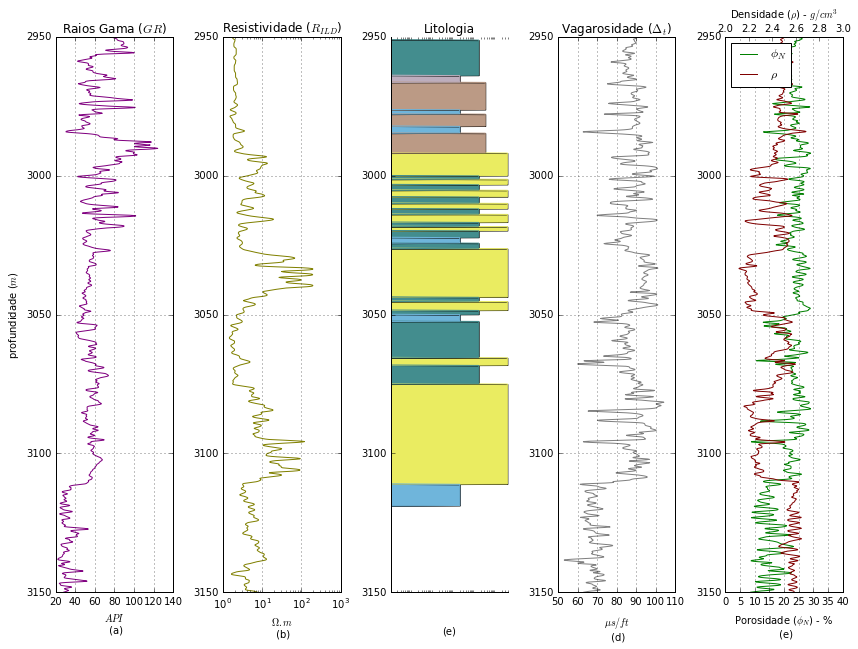

In [3]:
#
#Litologia
#
are = [0]*p;sil = [0]*p;cal = [0]*p;arg = [0]*p;mar = [0]*p

for i in range (p):
    if prof[i] >= 2966.2698 and prof[i] < 2976.1905:sil[i] = 70
    if prof[i] >= 2977.7778 and prof[i] < 2982.1429:sil[i] = 70
    if prof[i] >= 2984.5238 and prof[i] < 2991.6667:sil[i] = 70
    #----------------------------------------------#
    if prof[i] >= 2991.6667 and prof[i] < 3000.0000:are[i] = 90
    if prof[i] >= 3001.1905 and prof[i] < 3003.1746:are[i] = 90
    if prof[i] >= 3005.1587 and prof[i] < 3007.5397:are[i] = 90
    if prof[i] >= 3009.9206 and prof[i] < 3011.9048:are[i] = 90
    if prof[i] >= 3013.8889 and prof[i] < 3016.6667:are[i] = 90
    if prof[i] >= 3018.2540 and prof[i] < 3019.8413:are[i] = 90
    if prof[i] >= 3026.1905 and prof[i] < 3043.6508:are[i] = 90
    if prof[i] >= 3045.2381 and prof[i] < 3048.4127:are[i] = 90
    if prof[i] >= 3065.4762 and prof[i] < 3068.2540:are[i] = 90
    if prof[i] >= 3075.0000 and prof[i] < 3111.1111:are[i] = 90
    #----------------------------------------------#
    if prof[i] >= 2976.1905 and prof[i] < 2977.7778:cal[i] = 60
    if prof[i] >= 2982.1429 and prof[i] < 2984.5238:cal[i] = 60
    if prof[i] >= 3022.2222 and prof[i] < 3024.2064:cal[i] = 60
    if prof[i] >= 3050.0000 and prof[i] < 3052.3810:cal[i] = 60
    if prof[i] >= 3111.1111 and prof[i] < 3118.8413:cal[i] = 60
    #----------------------------------------------#
    if prof[i] >= 2951.0000 and prof[i] < 2963.8889:arg[i] = 50
    if prof[i] >= 3000.0000 and prof[i] < 3001.1905:arg[i] = 50
    if prof[i] >= 3003.1746 and prof[i] < 3005.1587:arg[i] = 50
    if prof[i] >= 3007.5397 and prof[i] < 3009.9206:arg[i] = 50
    if prof[i] >= 3011.9048 and prof[i] < 3013.8889:arg[i] = 50
    if prof[i] >= 3016.6667 and prof[i] < 3018.2540:arg[i] = 50
    if prof[i] >= 3019.8413 and prof[i] < 3022.2222:arg[i] = 50
    if prof[i] >= 3024.2064 and prof[i] < 3026.1905:arg[i] = 50
    if prof[i] >= 3043.6508 and prof[i] < 3045.2381:arg[i] = 50
    if prof[i] >= 3048.4127 and prof[i] < 3050.0000:arg[i] = 50
    if prof[i] >= 3052.3810 and prof[i] < 3065.4762:arg[i] = 50
    if prof[i] >= 3068.2540 and prof[i] < 3075.0000:arg[i] = 50
    #----------------------------------------------#
    if prof[i] >= 2963.8889 and prof[i] < 2966.2698:mar[i] = 60

arem = [1e-6]*p;silt = [1e-6]*p;shal = [1e-6]*p;calu = [1e-6]*p;marl = [1e-6]*p # mao - Marga

for i in range(p):
    if are[i] == 90:arem[i] = 0.375
    if sil[i] == 70:silt[i] = 0.033
    if arg[i] == 50:shal[i] = 0.016
    if cal[i] == 60:calu[i] = 0.002
    if mar[i] == 60:marl[i] = 0.002
del(are,sil,arg,mar,cal)
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')
ax3.fill_betweenx(prof, arem, facecolor='#eaec61');ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e');ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax3.set_title('Litologia');ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=0.4,xmin=0)
ax3.invert_yaxis();ax3.spines['right'].set_visible(False);ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left');ax3.axes.get_xaxis().set_ticks([]);ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

0.326017066345 media (IGR) - indice de raio gama
0.130218060788  media (VSH) - quantidade de folhelho 
2.65 RHOma| 1.101 RHOf 55.5 DTPm 189.0 DTPf

14.6077227428  media (PHItd)%
6.90492189546  media (PHIsh)%
221  ponto de folhelho (Psh)
22.09737827715356 = porosidade sh tabelada| 1.14521774445 = porosidade sh calculada 2.64682 | 2.64682
14.5809897903 = porosidade D, tabelada| 14.5809897903 = porosidade D, calculada
19.5361102693 = porosidade S, tabelada| 21.2997733756 = porosidade, S calculada


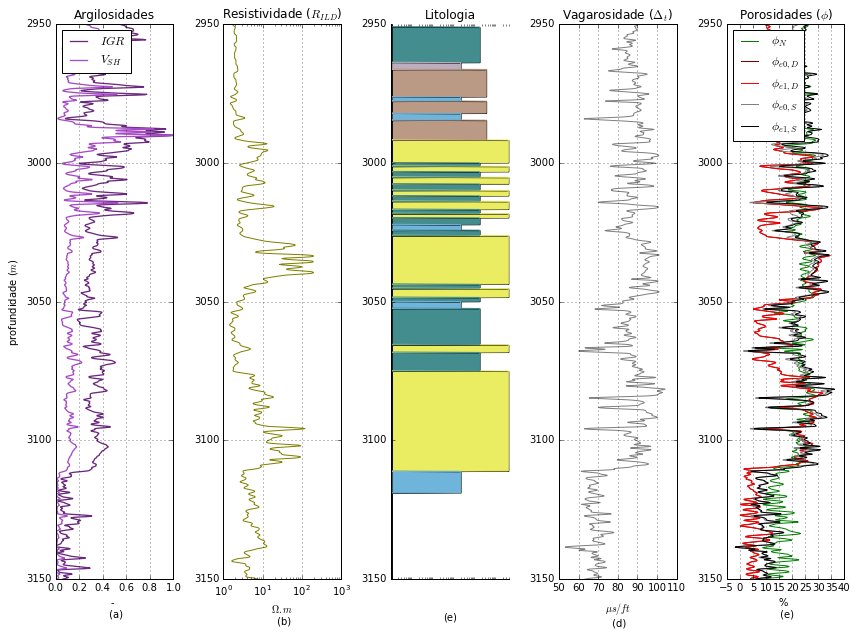

In [4]:
#
#Raio Gamma
#
IGR = [];VSH = []

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print(mean(IGR),'media (IGR) - indice de raio gama');print(mean(VSH),' media (VSH) - quantidade de folhelho ')
#
#Porosidade
#
RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.64682;DTPsh = 85.0
print (RHOma, 'RHOma|',RHOf,'RHOf',DTPma,'DTPm',DTPf,'DTPf')
#------------------------------------------------------------------------------------------------#
PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

for i in range (p):
    PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
    PHIsh.append(PHIN[i] - PHItd0)
    PHItd.append(PHItd0)
print ();print (mean(PHItd),' media (PHItd)%');print (mean(PHIsh),' media (PHIsh)%')
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIN - PHItd):Psh = i
        
print (Psh,' ponto de folhelho (Psh)');RHOsh2 = RHOb[Psh];VPsh2  = 108.9*(RHOsh2**4.0)
DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
PHIs0  = 100.0*((DTPsh - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh2 - DTPma)/(DTPf - DTPma))
print (PHIs0,'= porosidade sh tabelada|',PHIs1,'= porosidade sh calculada', RHOsh,"|",RHOsh2)
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIed0 = [];PHIed1 = []
for i in range (p):
    PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
    PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIed0),'= porosidade D, tabelada|',mean(PHIed1),'= porosidade D, calculada')
#-----------------------------------------Porosidade Sonica--------------------------------------------------
PHIts = [];PHIes0 = [];PHIes1 = []

DTPsh = DTP[Psh]
for i in range (p):
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes0.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh  - DTPma)/(DTPf - DTPma))))*100.00)
    PHIes1.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh2 - DTPma)/(DTPf - DTPma))))*100.00)
print (mean(PHIes0),'= porosidade S, tabelada|',mean(PHIes1),'= porosidade, S calculada')
#--------------------------------------------------------Graficos------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')
ax3.fill_betweenx(prof, arem, facecolor='#eaec61');ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e');ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax3.set_title('Litologia');ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=0.4,xmin=0)
ax3.invert_yaxis();ax3.spines['right'].set_visible(False);ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left');ax3.axes.get_xaxis().set_ticks([]);ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIed0,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e0,D}$')
ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
ax5.plot(PHIes0,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e0,S}$')
ax5.plot(PHIes1,prof,'-',linewidth = 1,color='Black' ,label='$\phi_{e1,S}$')
ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético (teste) -</font></center>
<br>
<br>
<br>Augusto 1 - $V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.43 − 4.05 \phi_{e,D} − 1.38 V_{sh} + 2.40 × 10^{−3} R_{ILD}$
<br>Augusto 2 - $V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.80 − 8.20 \phi_{e,D} − 4.31 V_{sh} + 12.72\phi_{e,D} V_{sh} + 10.42 \phi_{e,D}^2 + 2.57 V_{sh}^2$


rP  = 0.801521133389 |mP  = 382.880258226 |stdP  = 289.962190693
rE1 = 0.83038107505 |mE1 = 206.936028866 |stdE1 = 186.751656756
rE2 = 0.785219551192 |mE2 = 243.128342184 |stdE2 = 191.967480984

rNA02 0.75785441994
rRJS19 0.549228812961
rNA07 0.822526896872
rNA12 0.822191936287
rNA37 0.450563695
rRJS42 0.20762038852


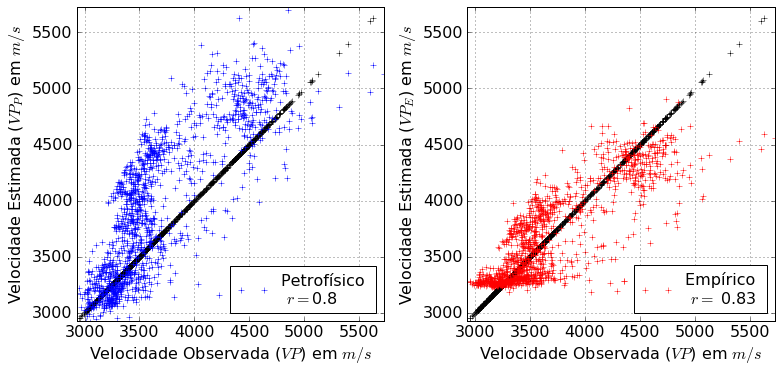

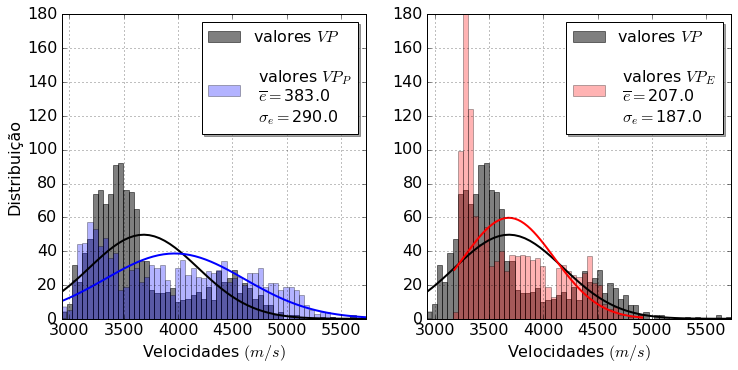

In [13]:
#---------------------------------------------------Estimando VP-------------------------------------------------#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
#---------------------------------------------------------------
pet = u"- Petrofísico"; emp = u"- Empírico";petp = name1+pet;empp = name1+emp # nomeclatura
#------------------------------------------------Modelo Petrofisico----------------------------------------------#
DTPp = [];VPp=[];errorP = []
for i in range (p):
    DTPp0 = (DTPma + (DTPf - DTPma)* ((PHIed0[i]/100.0)+(VSH[i]*(PHIs0/100.0))))
    DTPp.append(DTPp0)
    VPp0 = (1.00/(cfvp*DTPp0))
    errorP.append(abs(VP[i]-VPp0))
    VPp.append(VPp0)

print('rP  =',np.corrcoef(VP,VPp)[0,1],'|mP  =',np.mean(errorP),'|stdP  =',np.std(errorP))
#--------------------------------------------------Modelo Empirico-----------------------------------------------#
VPe1=[];VPe2=[];VPe_02=[];VPe_07=[];VPe_12=[];VPe_37=[];VPe_RJS42=[];VPe_RJS19=[];errorE1=[];errorE2=[]

for i in range (p): # determinando VPa em ms
    VPe01=1000*(4.80 - (8.20*PHIed0[i]/100.0) - (4.31*VSH[i]) + (12.72*(PHIed0[i]/100.0)*VSH[i]) 
    + (10.42*(PHIed0[i]/100)**2) + (2.57*VSH[i]**2))
    errorE1.append(abs(VP[i]-VPe01))
    VPe1.append(VPe01)
    VPe02=(1000*(4.43 -(4.05*PHIed0[i]/100.0) - (1.38*VSH[i]) + (2.40*(ILD[i])*10**(-3))))
    errorE2.append(abs(VP[i]-VPe02))
    VPe2.append(VPe02)
    
    # Outros Pocos
    
    
    
    VPe_02.append(1000*(4.29 - (2.66*PHIed1[i]/100.0) - (1.78*VSH[i]) - (5.38*ILD[i]*(10**(-5)))))
    VPe_07.append(1000*(4.84 - (8.43*PHIed1[i]/100.0) - (5.52*VSH[i]) + (18.78*(PHIed1[i]/100.0)*VSH[i]) 
    + (8.94*((PHIed1[i]/100)**2)) + (2.25*VSH[i]**2)))
    VPe_12.append(1000*(4.28 - (5.63*PHIed1[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIed1[i]/100.0)*VSH[i]) 
    + 6.76*(PHIed1[i]/100.0)**2 + (0.85*(VSH[i])**2)))
    VPe_37.append(1000*(3.90 - (5.07*PHIed1[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2)))))
    VPe_RJS42.append(1000*(3.89 -(5.11*(PHIed1[i]/100.0)) - (0.82*VSH[i]) + (0.07*ILD[i]) 
    + (1.11*(PHIed1[i]/100.0)*VSH[i]) - (0.35*(PHIed1[i]/100.0)*ILD[i]) + ((9.16*(10**(-3)))*(VSH[i])*ILD[i])
    + (15.40*((PHIed1[i]/100)**2)) + (0.23*(VSH[i]**2)) - ((7.29*(10**(-4)))*(ILD[i]**2))))
    VPe_RJS19.append(1000*(4.63 - (9.82*PHIed1[i]/100) - (2.25*VSH[i]) + (0.08*ILD[i]) 
    + (4.06*(PHIed1[i]/100)*VSH[i]) - (0.22*(PHIed1[i]/100)*ILD[i]) + (0.00192*(VSH[i])*ILD[i]) 
    + (17.18*((PHIed1[i]/100)**2))+ (1.26*((VSH[i])**2)) - (0.000266*((ILD[i])**2))))

print('rE1 =',np.corrcoef(VP,VPe1)[0,1],'|mE1 =',np.mean(errorE1),'|stdE1 =',np.std(errorE1))
print('rE2 =',np.corrcoef(VP,VPe2)[0,1],'|mE2 =',np.mean(errorE2),'|stdE2 =',np.std(errorE2));print();
print('rNA02',np.corrcoef(VP,VPe_02)[0,1]);print('rRJS19',np.corrcoef(VP,VPe_RJS19)[0,1]);
print('rNA07',np.corrcoef(VP,VPe_07)[0,1]);print('rNA12',np.corrcoef(VP,VPe_12)[0,1]);
print('rNA37',np.corrcoef(VP,VPe_37)[0,1]);print('rRJS42',np.corrcoef(VP,VPe_RJS42)[0,1])
#-----------------------------------------------------Graficos--------------------------------------------------#
fig = plt.figure(figsize= (11,10))

scatterP='Petrofísico \n $r=$'+str(round(np.corrcoef(VP,VPp)[0,1],2));
scatterE='Empírico \n $r =$ '+str(round(np.corrcoef(VP,VPe1)[0,1],2))

ax1=plt.subplot(221);ax1.plot(VP,VP,'+k');ax1.plot(VP,VPp,'+b',label=scatterP);legend=ax1.legend(loc=4,fontsize=16)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP))
plt.xlabel('Velocidade Observada ($VP$) em $m/s$',fontsize=16)
plt.ylabel('Velocidade Estimada ($VP_P$) em $m/s$',fontsize=16)
plt.grid()
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2=plt.subplot(222);ax2.plot(VP,VP,'+k');ax2.plot(VP,VPe1,'+r',label=scatterE)
legend=ax2.legend(loc=4,fontsize=16)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP));
plt.xlabel('Velocidade Observada ($VP$) em $m/s$',fontsize=16)
plt.ylabel('Velocidade Estimada ($VP_E$) em $m/s$',fontsize=16);plt.grid()
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
fig.tight_layout()

plt.show()
#----------------------------------------------------Histograma-------------------------------------------------#
bins_s=60;bins_vp = np.linspace(min(VP), max(VP), bins_s)

label_hist_e = '\n valores $VP_E$ \n $\overline{e} =$'+str(round(np.mean(errorE1))) \
+'\n $\sigma_e =$'+str(round(np.std(errorE1)));label_hist_p = '\n valores $VP_P$ \n $\overline{e} =$' \
+str(round(np.mean(errorP)))+'\n $\sigma_e =$'+str(round(np.std(errorP)))
#-----------------------------------------------------------------------------------------------------#
X_VP  = np.linspace(min(VP), max(VP),bins_s)
dx_VP = np.histogram(VP ,bins=bins_vp)[1][1] - np.histogram(VP ,bins=bins_vp)[1][0]
Y_VP  = mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),np.sqrt(np.var(VP)))*len(VP)*dx_VP
#-------------------------------------------------------------------------------------------------------------#
X_VPe  = np.linspace(min(VPe1), max(VPe1),bins_s)
dx_VPe = np.histogram(VPe1,bins=bins_vp)[1][1] - np.histogram(VPe1 ,bins=bins_vp)[1][0]
Y_VPe  = mlab.normpdf(np.linspace(min(VPe1),max(VPe1),bins_s),np.mean(VPe1),np.sqrt(np.var(VPe1)))*len(VPe1)*dx_VPe
#-------------------------------------------------------------------------------------------------------------#
X_VPp  = np.linspace(min(VPp), max(VPp),bins_s)
dx_VPp = np.histogram(VPp ,bins=bins_vp)[1][1] - np.histogram(VPp ,bins=bins_vp)[1][0]
Y_VPp  = mlab.normpdf(np.linspace(min(VPp),max(VPp),bins_s),np.mean(VPp),np.sqrt(np.var(VPp)))*len(VPp)*dx_VPp
#-------------------------------------------------------------------------------------------------------------#
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.hist(VP,bins_vp,histtype='bar',stacked=True,color='k',alpha=0.5,label='valores $VP$')
ax1.plot(X_VP,Y_VP,linewidth=2,color='k')
ax1.hist(VPp , bins_vp, histtype='bar', stacked=True, color='b', alpha=0.3,label=label_hist_p)
ax1.plot(X_VPp,Y_VPp,linewidth = 2, color='b')
plt.xlabel('Velocidades $(m / s)$',fontsize=16);plt.ylabel('Distribuição',fontsize=16);plt.grid()
plt.xlim(xmax=max(VP),xmin=min(VP));
plt.ylim(ymax=180,ymin=0);legend = ax1.legend(loc=1, shadow=True,fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2 = plt.subplot(222)
ax2.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.5,label='valores $VP$')
ax2.plot(X_VP ,Y_VP ,linewidth = 2, color='k')
ax2.hist(VPe1 , bins_vp, histtype='bar', stacked=True, color='r', alpha=0.3,label=label_hist_e)
ax2.plot(X_VPe,Y_VPe,linewidth = 2, color='r')
plt.xlabel('Velocidades $(m / s)$',fontsize=16);plt.grid();plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=180,ymin=0)
legend = ax2.legend(loc=1, shadow=True,fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

plt.show()

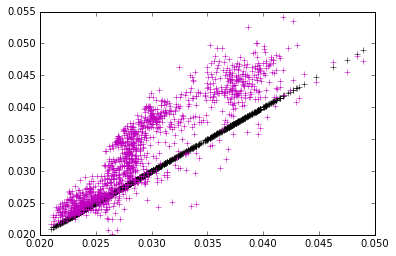

29446.3731812 28119.6370377 29441.1003901


In [6]:
DTPau = []

for i in range (p):
    DTP0 = 1.00/(VPe1[i])
    DTPau.append(DTP0/cfvp)

feet = 3.28084

Dtma = 169.0/feet
Dtsh = 396.0/feet
Dtf  = 564.0/feet

Pma = 2.65
Psh = 2.40
Pf  = 1.10

Zkm = []
Zrb = []
Z   = []
Zau = []

z  = []
zp = []
ze = []

for i in range(p):
    
    Z.append(RHOb[i]/DTP[i]) # Impedancia Observada
    
    # Constantes
    KKK = ((Psh - Pma)/(Pf - Pma))-((Dtsh - Dtma)/(Dtf - Dtma))
    p1 = Pf - Pma
    t1 = Dtf - Dtma
    
    Zkm0=(1.00/DTP[i])*((((VSH[i]*KKK)+ (DTP[i] - Dtma)/t1)*p1)+Pma) # Kamel e Mabrouk
    Zkm.append(Zkm0)                                                 # Kamel e Mabrouk
    
    Zrb.append(RHOb[i]/(t1*(((RHOb[i] - Pma)/p1) - VSH[i]*KKK) + Dtma)) # Kamel e Mabrouk sem VP
    
    Zau0 = RHOb[i]/DTPau[i] # Impedancia Augusto
    Zau.append(Zau0)        # Impedancia Augusto
    
    z.append((RHOb[i]/DTP[i])*(10**(6))) # Impedancia em ft/sec.g/cm3
    zp.append(Zkm0*(10**(6)))            # Impedancia Augusto em ft/sec.g/cm3
    ze.append(Zau0*(10**(6)))            # Impedancia Kamel em ft/sec.g/cm3


plt.plot(Z,Z,'+k')
plt.plot(Z,Zrb,'+m') # Kamel e Mabrouk sem VP
plt.show()
print (np.mean(z),np.mean(zp),np.mean(ze))

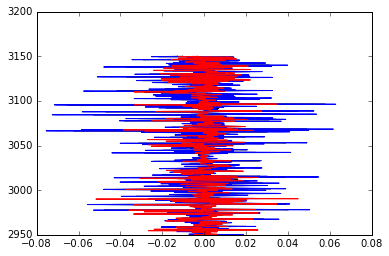

In [7]:
#-----------------------------------------------Refletividades---------------------------------------------------#
R = [];Rp = [];Re = [] # Refletividades

for i in range (p):
    if i == 0:
        RR = 0;RRp= 0;RRe= 0
    if i != 0:
        RR = (z[i-1] - z[i])/(z[i-1] + z[i])
        RRp= (zp[i-1] - zp[i])/(zp[i-1] + zp[i])
        RRe= (ze[i-1] - ze[i])/(ze[i-1] + ze[i])
    R.append(RR);Rp.append(RRp);Re.append(RRe)
    
zero_bar = [0]*p
#-------------------------------------------------------------------------------------------------------------#
plt.plot(R ,prof,'-k',linewidth = 1);plt.plot(Rp,prof,'-b',linewidth = 1);
plt.plot(Re,prof,'-r',linewidth = 1);plt.show()

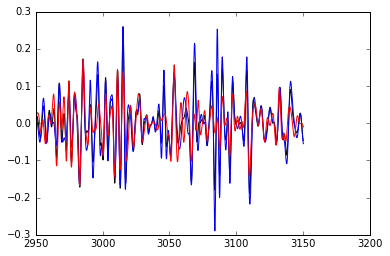

In [8]:
#----------------------------------------------Amplitude Sismica--------------------------------------------------#
DL = prof[3]-prof[2];To = [];Tp = [];Te = [];f = 600

for i in range (p):
    To.append(DL/VP[i]);Tp.append(DL/VPp[i]);Te.append(DL/VPe1[i])
    
TTT = np.cumsum(To);TTP = np.cumsum(Tp);TTE = np.cumsum(Te)

signal = []
for j in range (p):
    wavk = []
    for i in range (len(TTT)):
        EE1 = -(np.pi**2)*(f**2)*((TTT[j] - TTT[i])**2)
        wav0 = R[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTT[j] - TTT[i])**2))*np.exp(EE1);wavk.append(wav0)
    FXO1 = np.sum(wavk)
    signal.append(FXO1)
    
signalp = []
for j in range (p):
    wavkp = []
    for i in range (len(TTP)):
        EE1p = -(np.pi**2)*(f**2)*((TTP[j] - TTP[i])**2)
        wav0p = Rp[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTP[j] - TTP[i])**2))*np.exp(EE1p);wavkp.append(wav0p)
    FXO1p = np.sum(wavkp)
    signalp.append(FXO1p)
    
signale = []
for j in range (p):
    wavke = []
    for i in range (len(TTE)):
        EE1e = -(np.pi**2)*(f**2)*((TTE[j] - TTE[i])**2)
        wav0e = Re[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTE[j] - TTE[i])**2))*np.exp(EE1e);wavke.append(wav0e)
    FXO1e = np.sum(wavke)
    signale.append(FXO1e)
    
plt.plot(prof,signal ,'-k');plt.plot(prof,signalp,'-b');plt.plot(prof,signale,'-r');plt.show()

4758.90774643


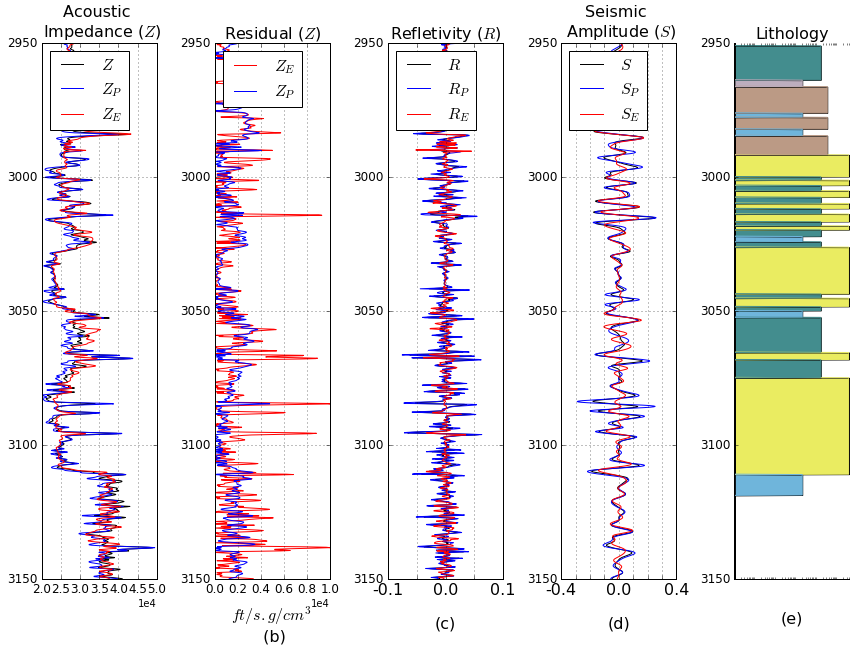

In [9]:
resp = [] # residuo kamel e mabrouk
rese = [] # residuo augusto

for i in range (p):
    resp.append(abs(z[i]-zp[i]))
    rese.append(abs(z[i]-ze[i]))
    
print (max(resp))
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(z  ,prof,'-k',linewidth = 1,label='$Z$')
ax1.plot(zp,prof,'-b',linewidth = 1,label='$Z_{P}$')
ax1.plot(ze,prof,'-r',linewidth = 1,label='$Z_{E}$')         

ax1.set_title('Acoustic \n Impedance ($Z$)',fontsize=16);ax2.set_xlabel('$ft/s.g/cm^3$ \n (b)',fontsize=16)
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=50000,xmin=20000);ax1.invert_yaxis();ax1.grid()
ax1.legend(loc=2,fontsize=16)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x

#ax1.set_xticklabels([" ",6," ",10," ",14])
#--------------------------------------------------------------------------------------------------#
ax2.plot(rese,prof,'-r',linewidth = 1,label='$Z_{E}$')
ax2.plot(resp,prof,'-b',linewidth = 1,label='$Z_{P}$')

ax2.set_title('Residual ($Z$)',fontsize=16);ax2.set_xlabel('$ft/s.g/cm^3$ \n (b)',fontsize=16)
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=10000,xmin=0);ax2.invert_yaxis();ax2.grid()
ax2.legend(loc=2,fontsize=16)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax2.set_xticklabels([" ",6," ",10," ",14])
#--------------------------------------------------------------------------------------------------#
ax3.plot(R ,prof,'-k',linewidth = 1,label='$R$') ;ax3.plot(Rp,prof,'-b',linewidth = 1,label='$R_{P}$') 
ax3.plot(Re,prof,'-r',linewidth = 1,label='$R_{E}$');ax3.set_title('Refletivity ($R$)',fontsize=16)
ax3.set_xlabel('(c)',fontsize=16);ax3.xaxis.set_label_coords(0.5, -0.07);ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1);ax3.invert_yaxis();ax3.grid();ax3.legend(loc=2,fontsize=16)
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xticklabels([-0.1," ",0.0," ",0.1])
#--------------------------------------------------------------------------------------------------#
ax4.plot(signal ,prof,'-k',linewidth = 1,label='$S$') ;ax4.plot(signalp,prof,'-b',linewidth = 1,label='$S_P$')
ax4.plot(signale,prof,'-r',linewidth = 1,label='$S_E$');ax4.set_title('Seismic \n Amplitude ($S$)',fontsize=16)
ax4.set_xlabel('(d)',fontsize=16);ax4.xaxis.set_label_coords(0.5, -0.07);ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4);ax4.invert_yaxis();ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])
ax4.grid();ax4.legend(loc=2,fontsize=16)
ax4.tick_params(axis='x', labelsize=16)
ax4.tick_params(axis='y', labelsize=12)
ax4.set_xticklabels([-0.4," "," "," ",0.0," "," "," ",0.4," "])
#--------------------------------------------------------------------------------------------------#
ax5.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax5.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax5.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax5.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax5.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe');ax5.fill_betweenx(prof, arem, facecolor='#eaec61')
ax5.fill_betweenx(prof, silt, facecolor='#bb9a85');ax5.fill_betweenx(prof, shal, facecolor='#438d8e')
ax5.fill_betweenx(prof, calu, facecolor='#6fb5db');ax5.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax5.set_title('Lithology',fontsize=16);ax5.set_ylim(ymax=max(prof),ymin=min(prof));ax5.set_xlim(xmax=0.4,xmin=0)
ax5.invert_yaxis();ax5.spines['right'].set_visible(False);ax5.spines['top'].set_visible(False)
ax5.yaxis.set_ticks_position('left');ax5.axes.get_xaxis().set_ticks([]);ax5.set_xlabel('(e)',fontsize=16)
ax5.xaxis.set_label_coords(0.5, -0.06)
ax5.tick_params(axis='x', labelsize=16)
ax5.tick_params(axis='y', labelsize=12)

plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

Augusto determinou para o poço NA04 duas equações empíricas para calcular os valores de $V_P$: 

$\begin{multline}
V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.43 - 4.05 \phi_{e,D} - 1.38 V_{sh} + 2.40 \times 10^{-3} R_{ILD},
 \label{eq672}
\end{multline}$

e

$\begin{multline}
V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.80 - 8.20 \phi_{e,D} - 4.31 V_{sh} + 12.72\phi_{e,D} V_{sh} + 10.42 \phi_{e,D}^2 + 2.57 V_{sh}^2,
 \label{eq6722}
\end{multline}$

onde a equação \ref{eq6722} foi utilizada na análise devido aos resultados mais favoráveis ao modelo empírico, segundo o coeficiente de correlação (0.83 para a equação \ref{eq6722} e 0.79 para a equação \ref{eq672}), utilizada no cálculo de $Z_e$. A comparação entre as três impedâncias ($Z_{obs}$, $Z_{KM}$ e $Z_{e}$) está apresentada na figura XXX (a), onde podemos observar padrões mais evidenciados referente a litologia mais dicrestizada neste poço. No intervalo de 2950 a 2987, referente a porção superior do intervalo, onde predomina silte e folhelho, $Z_{KM}$ apresenta valores mais baixos que $Z_{obs}$ enquanto que $Z_{e}$ apresenta valores mais altos que a impedância observada neste intervalo, constituindo, no entanto, valores próximos de resíduos (figura XXX (b)). Onde existem espessas camadas de arenito (profundiades aproximadas de 3062 e 3090) observamos os menores valores de resíduos deste poço. Abaixo da profundiade de 3112, parece existir uma espessa camada de calcilutito, devido ao padrão apresentado pela impedância acústica neste intervalo, onde os valores de ambos os modelos tendem a ser subestimados. 

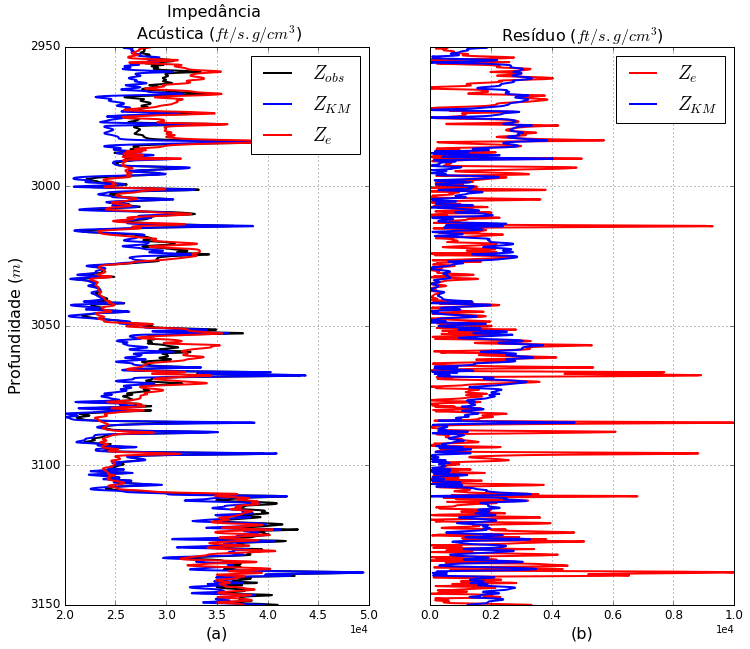

In [10]:
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2) = plt.subplots(1,2);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(z ,prof,'-k',linewidth = 2,label='$Z_{obs}$')
ax1.plot(zp,prof,'-b',linewidth = 2,label='$Z_{KM}$')
ax1.plot(ze,prof,'-r',linewidth = 2,label='$Z_{e}$')

ax1.set_ylabel('Profundidade ($m$)',fontsize=16)

ax1.set_title('Impedância \n Acústica ($ft/s.g/cm^3$)',fontsize=16);ax1.set_xlabel('(a)',fontsize=16)
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=50000,xmin=20000);ax1.invert_yaxis();ax1.grid()
ax1.legend(loc=1,fontsize=19)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
#ax1.set_xticklabels([" ",6," ",10," ",14])
#--------------------------------------------------------------------------------------------------#
ax2.plot(rese,prof,'-r',linewidth = 2,label='$Z_{e}$' )
ax2.plot(resp,prof,'-b',linewidth = 2,label='$Z_{KM}$')

ax2.set_title('Resíduo ($ft/s.g/cm^3$)',fontsize=16);ax2.set_xlabel('(b)',fontsize=16)
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=10000,xmin=0);ax2.invert_yaxis();ax2.grid()
ax2.legend(loc=1,fontsize=19)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
ax2.set_yticklabels([])
#ax2.set_xticklabels([" ",6," ",10," ",14])

plt.show()
name_sca_0 = 'dissertacao/na'+name0+'perfil1.pdf'
fig.savefig(name_sca_0, dpi=100, transparent=True, bbox_inches='tight')

LEG - (a) Variações dos valores de $Z$ em profundidade e (b) respectivos resíduos para o poço NA02.

Assim como foi observado para as impedâncias, também podemos observar o efeito da litologia na amplitude sísmica  (figura XXX), principalmente nas duas camadas de arenito e na suposta camada de calcilutito, onde a amplitude tende a ser mais baixa, carcaterizando uma maior homogeneidade. No entanto, na camada de arenito na profundidade de 3090, $S_{obs}$ e $S_{KM}$ indicam a existência de alguma heterogeneidade no interior dessa camada, enquanto que $S_{e}$ indica que este arenito é homogêneo. Para o calcilutito, as amplitudes sísmicas referentes aos modelos, apresentam valores próximos à amplitude observada.

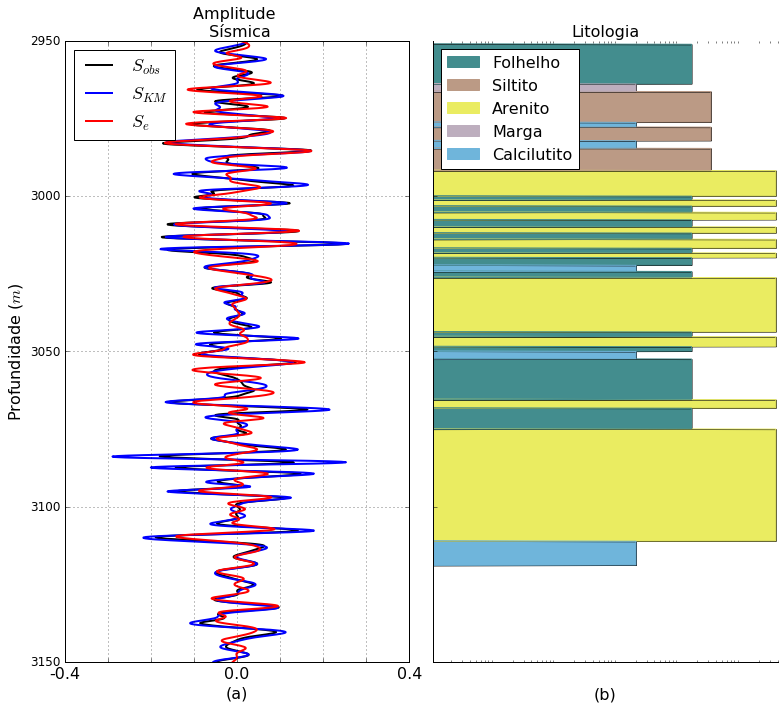

In [11]:
#--------------------------------------------------------------------------------------------------#
fig, (ax4, ax5) = plt.subplots(1,2);fig.set_size_inches(11, 11)
#--------------------------------------------------------------------------------------------------#
ax4.plot(signal ,prof,'-k',linewidth = 2,label='$S_{obs}$') ;ax4.plot(signalp,prof,'-b',linewidth = 2,label='$S_{KM}$')
ax4.plot(signale,prof,'-r',linewidth = 2,label='$S_e$');ax4.set_title('Amplitude \n Sísmica',fontsize=16)
ax4.set_xlabel('(a)',fontsize=16);ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4);ax4.invert_yaxis();ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])
ax4.grid();ax4.legend(loc=2,fontsize=18)
ax4.tick_params(axis='x', labelsize=16)
ax4.tick_params(axis='y', labelsize=12)
ax4.set_xticklabels([-0.4," "," "," ",0.0," "," "," ",0.4," "])
#ax4.set_yticklabels([])

ax4.set_ylabel('Profundidade ($m$)',fontsize=16)
#--------------------------------------------------------------------------------------------------#
ax5.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax5.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax5.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax5.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax5.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe');ax5.fill_betweenx(prof, arem, facecolor='#eaec61')
ax5.fill_betweenx(prof, silt, facecolor='#bb9a85');ax5.fill_betweenx(prof, shal, facecolor='#438d8e')
ax5.fill_betweenx(prof, calu, facecolor='#6fb5db');ax5.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax5.set_title('Litologia',fontsize=16);ax5.set_ylim(ymax=max(prof),ymin=min(prof));ax5.set_xlim(xmax=0.4,xmin=0)
ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])
ax5.set_xlabel( '(b)',fontsize=16)
ax5.xaxis.set_label_coords(0.5, -0.04)
ax5.tick_params(axis='x', labelsize=16)
ax5.tick_params(axis='y', labelsize=12)

lab_a = mpatches.Patch(label='Folhelho'   ,color='#438d8e')
lab_b = mpatches.Patch(label='Siltito'    ,color='#bb9a85')
lab_c = mpatches.Patch(label='Arenito'    ,color='#eaec61')
lab_d = mpatches.Patch(label='Marga'      ,color='#bdaebe')
lab_e = mpatches.Patch(label='Calcilutito',color='#6fb5db')
ax5.set_yticklabels([])

ax5.legend(handles=[lab_a,lab_b,lab_c,lab_d,lab_e], loc=2, fontsize=16)

plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()
#--------------------------------------------------------------------------------------------------#
name_sca_0 = 'dissertacao/na'+name0+'perfil2.pdf'
fig.savefig(name_sca_0, dpi=100, transparent=True, bbox_inches='tight')

(a) Amplitude sísmica e (b) litologia do poço NA04.

O gráfico de dispersão indica uma boa correlação para ambos os modelos do poço NA04, em particular para $Z_{KM}$ que mesmo para valores altos de impedância, apresenta valores próximos de $Z_{obs}$, distoando apenas nos valores ligeiramente subestimados para valores intermediários e altos.

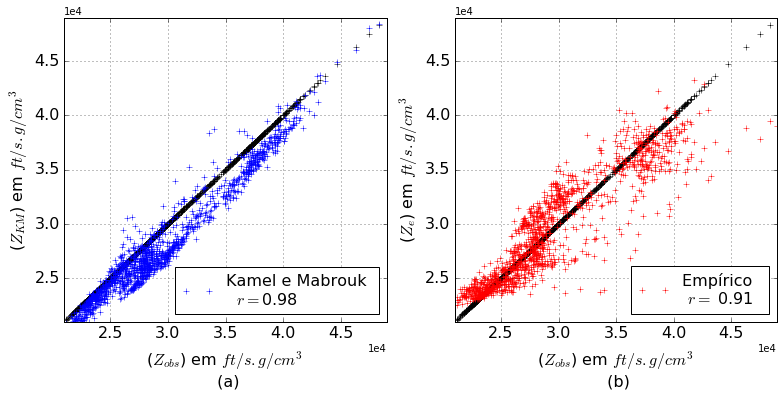

In [12]:
#-----------------------------------------------------Graficos--------------------------------------------------#

fig = plt.figure(figsize= (11,10))

scatterP='Kamel e Mabrouk \n  $r=$'+str(round(np.corrcoef(z,zp)[0,1],2)) # Legendas!
scatterE='Empírico  \n $r =$ '+str(round(np.corrcoef(z,ze)[0,1],2)) # Legendas

ax1=plt.subplot(221)
ax1.plot(z,z,'+k')
ax1.plot(z,zp,'+b',label=scatterP);legend=ax1.legend(loc=4,fontsize=16)

ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # ordem de grandeza x

plt.xlim(xmax=max(z),xmin=min(z));plt.ylim(ymax=max(z),ymin=min(z))
plt.xlabel('($Z_{obs}$) em $ft/s.g/cm^3$ \n (a)',fontsize=16)
plt.ylabel('($Z_{KM}$) em $ft/s.g/cm^3$',fontsize=16)
plt.grid()
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x

ax2=plt.subplot(222)
ax2.plot(z,z,'+k')
ax2.plot(z,ze,'+r',label=scatterE)

ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # ordem de grandeza x
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # ordem de grandeza x

legend=ax2.legend(loc=4,fontsize=16)
plt.xlim(xmax=max(z),xmin=min(z));plt.ylim(ymax=max(z),ymin=min(z));
plt.xlabel('($Z_{obs}$) em $ft/s.g/cm^3$ \n (b)',fontsize=16)
plt.ylabel('($Z_e$) em $ft/s.g/cm^3$',fontsize=16);plt.grid()
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
fig.tight_layout()

plt.show();
name_sca_0 = 'dissertacao/na'+name0+'scatterplot.pdf'
fig.savefig(name_sca_0, dpi=100, transparent=True, bbox_inches='tight')

(a) Gráficos de dispersão de $Z_{obs}$ (cruz preta) por $Z_{KM}$ (cruz azul) e (b) $Z_{obs}$ (cruz preta) por $Z_{e}$ (cruz vermelha) para o poço NA04 do campo de namorado. Os valores em $r$ representam o coeficiente de correlação entre $Z_{obs}$ e seus respectivos modelos. (quanto mais próximo de 1.0, melhor a correlação)